In [1]:
% some housekeeping stuff
%register_graphics_toolkit ("gnuplot");
%available_graphics_toolkits ();
graphics_toolkit ("plotly")
clear
% end of housekeeping

In [2]:
[KSOLUTION,ASOLUTION,SOLUTIONNAMES]=get_equilib_defn;

FeT=1; 
pH=2:0.5:12; T=[FeT]; 

for i=1:size(pH,2)
    [Ksolution,Asolution]=get_equilib_fixed_pH(KSOLUTION,ASOLUTION,pH(i));
    X=T./10; [xguess,masserr,J,C] = nl_massbalancerrnosolid_NR(X,Asolution,Ksolution,T);
    c=0;
    for k=1:size(SOLUTIONNAMES,1)
        txt=[SOLUTIONNAMES(k,:),'(i)=C(k);'];
        eval(txt)
        c=c+1;
    end
    masserrV(i)=masserr;
end


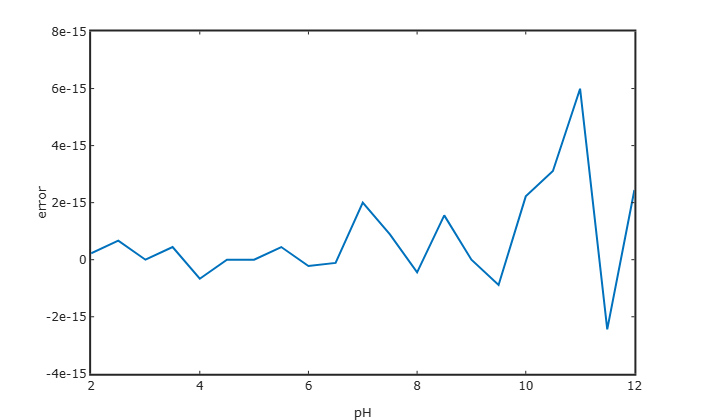

In [3]:
%plot -s 600,500 -f 'svg'
plot(pH,masserrV,'linewidth',2); set(gca,'linewidth',2,'fontsize',12)
xlabel('pH'); ylabel('error')

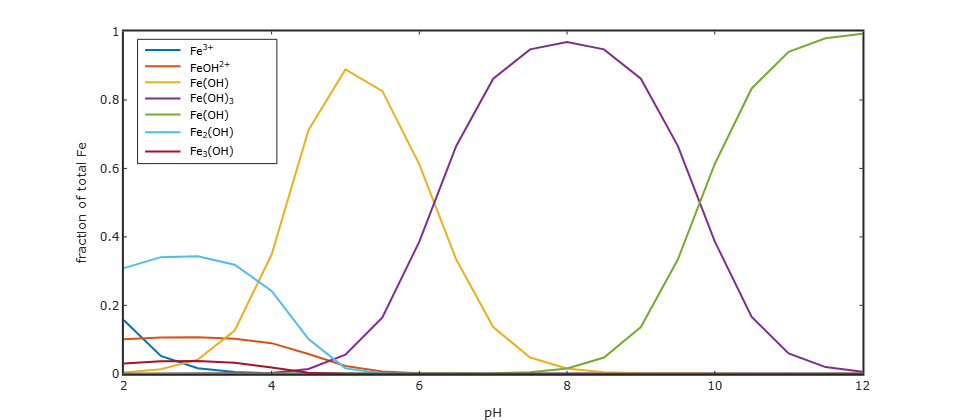

In [4]:
%plot -s 600,500 -f 'svg'

plot(pH,FeIII,'linewidth',2,pH,FeIIIOH,'linewidth',2,pH,FeIIIOH2,'linewidth',2,...
pH,FeIIIOH3,'linewidth',2,pH,FeIIIOH4,'linewidth',2,pH,FeIII2OH2,'linewidth',2,pH,FeIII3OH4,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('pH'); ylabel('fraction of total Fe')
legend('Fe^{3+}','FeOH^{2+}','Fe(OH)_2^+','Fe(OH)_3','Fe(OH)_4^-','Fe_2(OH)_2^{4+}','Fe_3(OH)_4^{5+}','location','northwest')

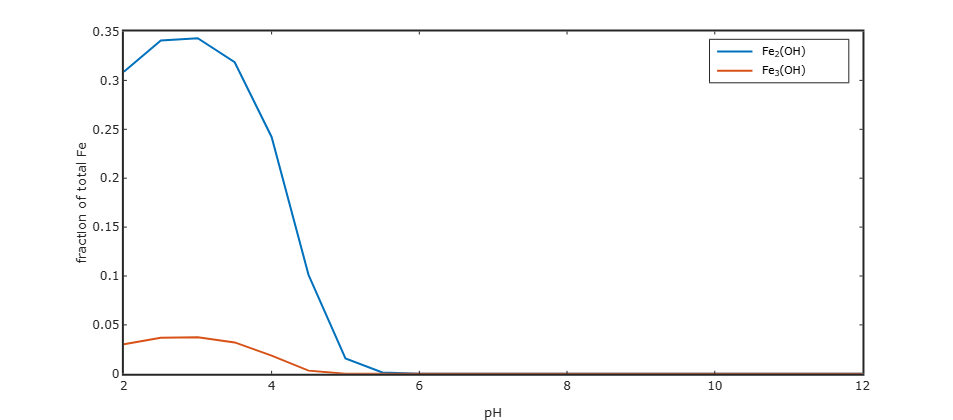

In [5]:
%plot -s 600,500 -f 'svg'
plot(pH,FeIII2OH2./FeT,'linewidth',2,pH,FeIII3OH4./FeT,'linewidth',2)
legend('Fe_2(OH)_2^{4+}','Fe_3(OH)_4^{5+}','location','northeast')
set(gca,'linewidth',2,'fontsize',12)
xlabel('pH'); ylabel('fraction of total Fe')